# Student Data Challenge Jan 2018

In [3]:
# packages
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn import ensemble
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from itertools import product
from collections import OrderedDict ### data structure.. for laziness
import seaborn as sns
import operator
%matplotlib inline

### new plain

In [9]:
# plain data
df2 = pd.read_csv('X_train.csv')
df2 = df2.drop(['Doctor Identifier'], axis = 1)
df2.head()

,Provider Type,Number of Services,Number of Beneficiaries,Total Submitted Charge Amount,Total Allowed Amount,Total Payment Amount,Total Standardized Payment Amount,Number of Drug Services,Total Drug Submitted Charge Amount,Total Drug Allowed Amount,...,Percent Depression,Percent Diabetes,Percent Hyperlipidemia,Percent Hypertension,Percent Ischemic Heart Disease,Percent Osteoporosis,Percent Rheumatoid Arthritis or Osteoarthritis,Percent Schizophrenia or Other Psychotic Disorders,Percent Stroke,Average HCC Risk Score of Beneficiaries
0,Optometry,491,66,52550.00,45827.70,34211.71,32460.86,0,0.00,0.00,...,75.0,18.00,41.0,50.0,3.11,0.83,23.0,18.00,0.65,1.28
1,Emergency Medicine,3883,211,165408.00,84216.16,62257.97,62267.51,3304,28918.00,18847.34,...,42.0,24.00,48.0,56.0,22.00,9.00,38.0,7.00,10.00,1.52
2,CRNA,3103,632,531584.25,230479.28,174262.00,167305.78,1016,32044.25,22049.04,...,24.0,19.00,44.0,57.0,25.00,12.00,67.0,4.00,7.00,1.11
3,Podiatry,43,42,2935.00,2932.84,1652.31,4208.75,0,0.00,0.00,...,31.0,0.89,62.0,57.0,36.00,0.27,38.0,0.44,0.25,1.00
4,Licensed Clinical Social Worker,151,34,13118.00,3991.45,3911.61,3402.45,0,0.00,0.00,...,56.0,75.00,75.0,75.0,41.00,0.05,56.0,0.00,0.03,1.57


In [10]:
df_ohe2 = pd.get_dummies(df2, 'Provider Type')
df_ohe2.head()

,Number of Services,Number of Beneficiaries,Total Submitted Charge Amount,Total Allowed Amount,Total Payment Amount,Total Standardized Payment Amount,Number of Drug Services,Total Drug Submitted Charge Amount,Total Drug Allowed Amount,Total Drug Payment Amount,...,Provider Type_Registered Dietician/Nutrition Professional,Provider Type_Rheumatology,Provider Type_Sleep Medicine,Provider Type_Speech Language Pathologist,Provider Type_Sports Medicine,Provider Type_Surgical Oncology,Provider Type_Thoracic Surgery,Provider Type_Unknown Physician Specialty Code,Provider Type_Urology,Provider Type_Vascular Surgery
0,491,66,52550.00,45827.70,34211.71,32460.86,0,0.00,0.00,0.00,...,0,0,0,0,0,0,0,0,0,0
1,3883,211,165408.00,84216.16,62257.97,62267.51,3304,28918.00,18847.34,14776.33,...,0,0,0,0,0,0,0,0,0,0
2,3103,632,531584.25,230479.28,174262.00,167305.78,1016,32044.25,22049.04,17062.35,...,0,0,0,0,0,0,0,0,0,0
3,43,42,2935.00,2932.84,1652.31,4208.75,0,0.00,0.00,0.00,...,0,0,0,0,0,0,0,0,0,0
4,151,34,13118.00,3991.45,3911.61,3402.45,0,0.00,0.00,0.00,...,0,0,0,0,0,0,0,0,0,0


In [12]:
df2_stand = (df_ohe2 - df_ohe2.mean())/(df_ohe2.std())

In [13]:
df2_stand.columns

Index(['Number of Services', 'Number of Beneficiaries',
       'Total Submitted Charge Amount', 'Total Allowed Amount',
       'Total Payment Amount', 'Total Standardized Payment Amount',
       'Number of Drug Services', 'Total Drug Submitted Charge Amount',
       'Total Drug Allowed Amount ', 'Total Drug Payment Amount ',
       ...
       'Provider Type_Registered Dietician/Nutrition Professional',
       'Provider Type_Rheumatology', 'Provider Type_Sleep Medicine',
       'Provider Type_Speech Language Pathologist',
       'Provider Type_Sports Medicine', 'Provider Type_Surgical Oncology',
       'Provider Type_Thoracic Surgery',
       'Provider Type_Unknown Physician Specialty Code',
       'Provider Type_Urology', 'Provider Type_Vascular Surgery'],
      dtype='object', length=113)

### use pca

In [16]:
df2_stand.head()

,Number of Services,Number of Beneficiaries,Total Submitted Charge Amount,Total Allowed Amount,Total Payment Amount,Total Standardized Payment Amount,Number of Drug Services,Total Drug Submitted Charge Amount,Total Drug Allowed Amount,Total Drug Payment Amount,...,Provider Type_Registered Dietician/Nutrition Professional,Provider Type_Rheumatology,Provider Type_Sleep Medicine,Provider Type_Speech Language Pathologist,Provider Type_Sports Medicine,Provider Type_Surgical Oncology,Provider Type_Thoracic Surgery,Provider Type_Unknown Physician Specialty Code,Provider Type_Urology,Provider Type_Vascular Surgery
0,-0.054055,-0.149748,-0.119307,-0.114199,-0.104583,-0.107071,-0.082824,-0.049353,-0.059193,-0.061618,...,-0.05783,-0.072064,-0.019724,-0.021086,-0.030745,-0.036538,-0.052777,-0.014908,-0.079833,-0.050061
1,0.078102,-0.072822,-0.065654,-0.027317,-0.031873,-0.029775,0.895218,0.056516,0.095352,0.093158,...,-0.05783,-0.072064,-0.019724,-0.021086,-0.030745,-0.036538,-0.052777,-0.014908,-0.079833,-0.050061
2,0.047712,0.150528,0.108427,0.303710,0.258498,0.242615,0.217930,0.067961,0.121605,0.117104,...,-0.05783,-0.072064,-0.019724,-0.021086,-0.030745,-0.036538,-0.052777,-0.014908,-0.079833,-0.050061
3,-0.071510,-0.162481,-0.142895,-0.211279,-0.188993,-0.180335,-0.082824,-0.049353,-0.059193,-0.061618,...,-0.05783,-0.072064,-0.019724,-0.021086,-0.030745,-0.036538,-0.052777,-0.014908,-0.079833,-0.050061
4,-0.067302,-0.166725,-0.138053,-0.208884,-0.183136,-0.182426,-0.082824,-0.049353,-0.059193,-0.061618,...,-0.05783,-0.072064,-0.019724,-0.021086,-0.030745,-0.036538,-0.052777,-0.014908,-0.079833,-0.050061


In [94]:
from sklearn.decomposition import PCA

pca = PCA(n_components=8)
pca.fit(df2_stand)
X_train_pca = pca.transform(df2_stand)
# X_test_pca = pca.transform(X_test_HD)

np.sum(pca.explained_variance_ratio_)

0.22026430478438933

### Try 1 class svm

In [46]:
from sklearn import svm

In [82]:
clf = svm.OneClassSVM(nu=0.001, kernel="rbf", gamma = 0.0001)

# np.random.seed(9001)
msk = np.random.rand(len(X_train_pca)) < 0.9

clf.fit(X_train_pca[msk])

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma=0.0001, kernel='rbf',
      max_iter=-1, nu=0.001, random_state=None, shrinking=True, tol=0.001,
      verbose=False)

In [83]:
risk = clf.decision_function(X_train_pca)

In [84]:
len(np.unique(risk))

17996

In [85]:
np.unique(risk)

array([-10.04884227,  -9.26364906,  -6.99207562, ...,   0.59199673,
         0.6138734 ,   0.6228742 ])

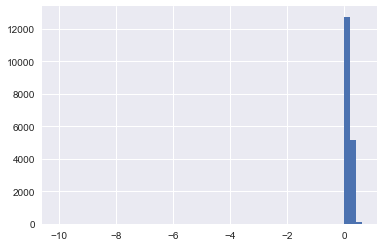

In [86]:
plt.hist(risk, bins = 50);

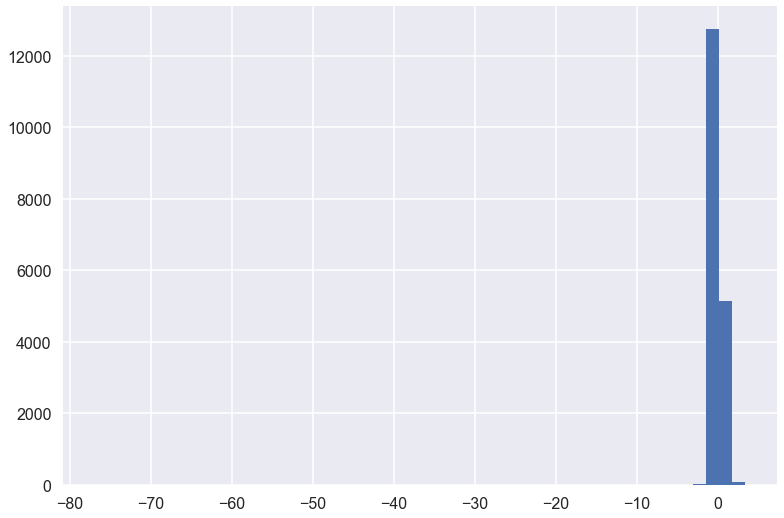

In [100]:
# standardize risk
sns.set_context('poster')
risk_std = (risk - risk.mean())/risk.std()
plt.hist(risk_std, bins = 50);

In [87]:
submission = pd.DataFrame(df['Doctor Identifier'])
submission['Risk'] = risk**2
submission.reset_index()
submission = submission.sort_values(['Risk'], ascending = False)

submission.to_csv('/Users/kate_zym/Documents/GitHub/datachallenge/svm12.csv', index = False, header = True)

In [105]:
# order the risk

test = pd.read_csv('svm12.csv')
test = test.sort_values(['Doctor Identifier'], ascending = True)

id_ordered = test['Doctor Identifier']

In [106]:
id_ordered

348      100068986
2798     100111109
13933    100191187
14048    100221241
8222     100270900
9634     100333837
10627    100336958
11538    100360522
14850    100414312
17196    100500717
13564    100523519
5229     100538890
16905    100570261
2683     100570730
2191     100575818
1255     100663426
4668     100671167
6703     100719666
13583    100750431
15438    100835610
11909    100843341
5844     100953690
11010    101120911
708      101170099
1814     101299765
13084    101334777
14476    101367176
225      101386523
14883    101414783
9422     101489408
           ...    
3316     998338708
8900     998358397
16596    998412869
6977     998442454
2971     998463882
14646    998477122
119      998530672
5098     998564066
11111    998581084
5910     998743880
13227    998821105
3975     998851281
2013     998916077
4122     999163701
9267     999243534
2335     999325483
4020     999360630
1536     999373525
1189     999391437
2627     999400013
8974     999463747
16448    999

## Cross validation

In [101]:
from sklearn.model_selection import KFold

In [154]:
scores = np.zeros(5)


In [155]:
n_folds =5;
nus = [0.0001, 0.0005, 0.001, 0.0025, 0.005]
gammas = [0.00005, 0.00075, 0.0001, 0.00025, 0.001]

All_Scores = np.zeros(25)
count = 0;

for n in nus:
    for g  in gammas:
        
        compare = np.empty([18000, 1]);
        
        for train, valid in KFold(n_folds, shuffle=True).split(range(len(X_train_pca))):
            clf_cv = svm.OneClassSVM(nu=n, kernel="rbf", gamma = g)
            clf_cv.fit(X_train_pca[train,:])
            
            risk = clf.decision_function(X_train_pca)
            
            # sort by doctor IDs
            result = pd.DataFrame(df['Doctor Identifier']);
            result['Risk'] = risk**2
            result.reset_index()
            result = result.sort_values(['Risk'], ascending = False)
            
            result = result.sort_values(['Doctor Identifier'], ascending = True)

            id_ordered = result['Doctor Identifier'].values.reshape(-1,1)
            
            
            # hstack them
            compare = np.hstack([compare, id_ordered])
#             print(compare.shape)
            
        
        df_compare = pd.DataFrame(compare[:, 1:], columns=['fold_1', 'fold_2', 'fold_3', 'fold_4', 'fold_5'])
        min_score = len(X_train_pca)
        
        for ind1 in range(0,5):
            for ind2 in range(0,5):
                score = np.sum(df_compare.iloc[:, ind1] == df_compare.iloc[:, ind2])
                
                if score < min_score:
                    min_score =score
                    
        
        All_Scores[count] = min_score;
        
        count = count +1 ;
        

In [157]:
All_Scores

array([ 18000.,  18000.,  18000.,  18000.,  18000.,  18000.,  18000.,
        18000.,  18000.,  18000.,  18000.,  18000.,  18000.,  18000.,
        18000.,  18000.,  18000.,  18000.,  18000.,  18000.,  18000.,
        18000.,  18000.,  18000.,  18000.])

In [146]:
compare[1:, :].shape

(17999, 6)

In [153]:

df_compare = pd.DataFrame(compare[:, 1:], columns=['fold_1', 'fold_2', 'fold_3', 'fold_4', 'fold_5'])
np.sum(df_compare['fold_1'] == df_compare['fold_3'])

18000

(array([ 1740.,  1845.,  1822.,  1828.,  1899.,  1712.,  1848.,  1762.,
         1781.,  1763.]),
 array([  1.00068986e+08,   1.90057250e+08,   2.80045514e+08,
          3.70033778e+08,   4.60022042e+08,   5.50010306e+08,
          6.39998570e+08,   7.29986834e+08,   8.19975098e+08,
          9.09963362e+08,   9.99951626e+08]),
 <a list of 10 Patch objects>)

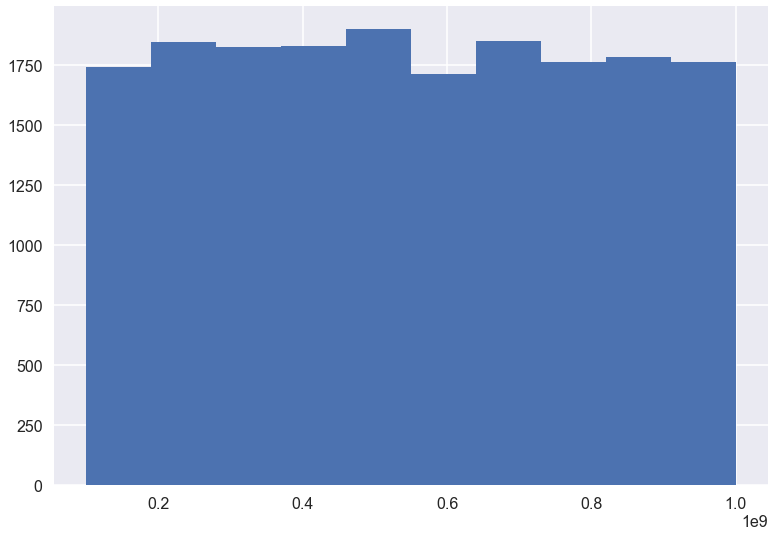

In [121]:
plt.hist(df['Doctor Identifier'])

In [132]:
X_train_pca[5:10, 6].shape

(5,)